In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Load the cars dataset.
df=pd.read_csv("C:\\Users\\91801\\Desktop\\skillovilla\\MACHINE LEARNING\\ASSIGNMENTS\\Linear regression-Assignment-1\\autos_small.csv")
df

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,NaN,101,astra,150000,NaN,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                10000 non-null  int64 
 1   name                 10000 non-null  object
 2   yearOfRegistration   10000 non-null  int64 
 3   monthOfRegistration  10000 non-null  int64 
 4   gearbox              9423 non-null   object
 5   powerPS              10000 non-null  int64 
 6   model                9433 non-null   object
 7   kilometer            10000 non-null  int64 
 8   fuelType             9057 non-null   object
 9   brand                10000 non-null  object
 10  vehicleType          8950 non-null   object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [4]:
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [5]:
df.shape

(10000, 11)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,10000.0,7056.7046,123750.134822,0.0,1150.0,2999.0,7250.0,12345678.0
yearOfRegistration,10000.0,2003.6374,40.424633,1000.0,1999.0,2004.0,2008.0,5000.0
monthOfRegistration,10000.0,5.7376,3.706794,0.0,3.0,6.0,9.0,12.0
powerPS,10000.0,122.0189,342.097210,0.0,69.0,105.0,150.0,17322.0
kilometer,10000.0,125034.0000,40581.689607,5000.0,100000.0,150000.0,150000.0,150000.0


**1-here we can see clear outliers in price,yearOfRegistration columns<br>
   2-There are some columns which are categorcal we need to encode them for further data processing and model creation**


In [7]:
df_ref=df.copy()

## Removing Outliers 

In [8]:
## We are removing extreme outliers from our dataframe
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df_cars=cap_data(df)

capping the  price
capping the  name
capping the  yearOfRegistration
capping the  monthOfRegistration
capping the  gearbox
capping the  powerPS
capping the  model
capping the  kilometer
capping the  fuelType
capping the  brand
capping the  vehicleType


In [9]:
df_cars.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
price,10000.0,5560.0,6787.0,0.0,1150.0,2999.0,7250.0,36005.0
yearOfRegistration,10000.0,2004.0,7.0,1979.0,1999.0,2004.0,2008.0,2018.0
monthOfRegistration,10000.0,6.0,4.0,0.0,3.0,6.0,9.0,12.0
powerPS,10000.0,112.0,69.0,0.0,69.0,105.0,150.0,344.0
kilometer,10000.0,125034.0,40582.0,5000.0,100000.0,150000.0,150000.0,150000.0


<AxesSubplot:>

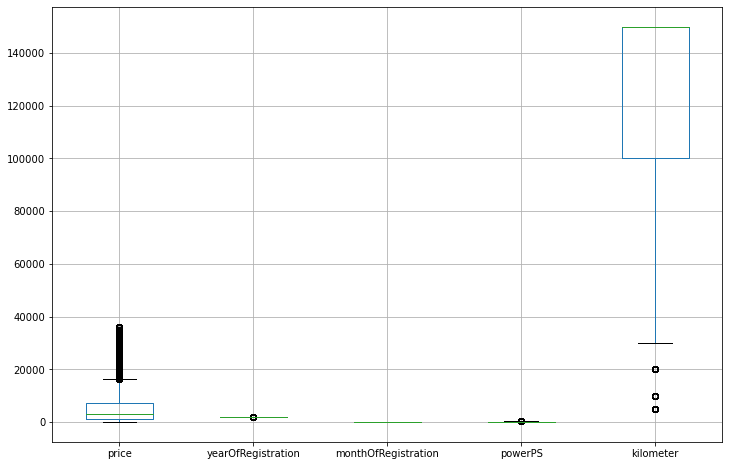

In [10]:
plt.figure(figsize=(12,8))
df_cars.boxplot()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>],
       [<AxesSubplot:title={'center':'monthOfRegistration'}>,
        <AxesSubplot:title={'center':'powerPS'}>],
       [<AxesSubplot:title={'center':'kilometer'}>, <AxesSubplot:>]],
      dtype=object)

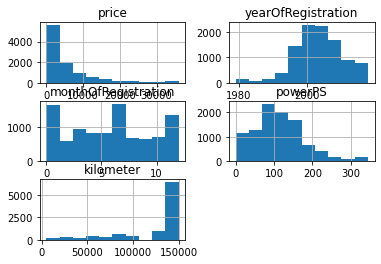

In [11]:

df_cars.hist()

In [12]:
# 2. Figure out the best strategy to fill missing values
df_cars.isnull().sum()#checking missing values for each column

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [13]:
# lets see how many distinct values are there in gearbox column
df_cars.gearbox.unique()                

array(['manuell', 'automatik', nan], dtype=object)

***We don't need model,monthOfRegistration,yearOfRegistration,name,vehicleType columns***

In [14]:
# we are considering total years from registration years till now in new column as 'tot_years'
df_cars['tot_years']=2022-df_cars['yearOfRegistration']

In [15]:
drop_li=['model','monthOfRegistration','yearOfRegistration','name','vehicleType']

In [16]:
df_cars=df.drop(drop_li,axis=1)# we are dropping some of columns which are not significant 

In [17]:
df_cars.head()


,price,gearbox,powerPS,kilometer,fuelType,brand,tot_years
0,400.0,manuell,89,60000,benzin,ford,30
1,3500.0,manuell,150,125000,NaN,bmw,26
2,2200.0,manuell,150,150000,benzin,mercedes_benz,24
3,4000.0,manuell,0,150000,diesel,audi,16
4,2600.0,automatik,41,150000,diesel,smart,20


In [18]:
df_cars.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
price,10000.0,5560.0,6787.0,0.0,1150.0,2999.0,7250.0,36005.0
powerPS,10000.0,112.0,69.0,0.0,69.0,105.0,150.0,344.0
kilometer,10000.0,125034.0,40582.0,5000.0,100000.0,150000.0,150000.0,150000.0
tot_years,10000.0,18.0,7.0,4.0,14.0,18.0,23.0,43.0


In [19]:
df_cars.corr()

,price,powerPS,kilometer,tot_years
price,1.000000,0.545946,-0.418531,-0.380321
powerPS,0.545946,1.000000,0.000647,-0.159468
kilometer,-0.418531,0.000647,1.000000,0.252886
tot_years,-0.380321,-0.159468,0.252886,1.000000


In [20]:
df_cars.isnull().sum()

price          0
gearbox      577
powerPS        0
kilometer      0
fuelType     943
brand          0
tot_years      0
dtype: int64

# Value Imputation using Groupby and Transform function

In [21]:
df_cars = df_cars[df_cars['gearbox'].notna()]

In [22]:
df_cars['fuelType'] = df_cars.groupby('brand').fuelType.transform(lambda x: x.value_counts().idxmax())

In [23]:
df_cars.isnull().sum()

price        0
gearbox      0
powerPS      0
kilometer    0
fuelType     0
brand        0
tot_years    0
dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

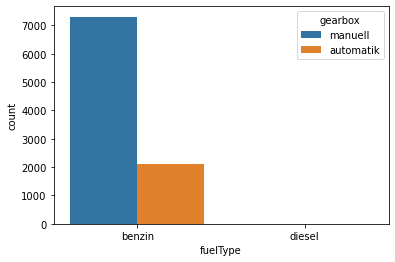

In [24]:
sns.countplot(data=df_cars,x='fuelType',hue='gearbox')

In [25]:
df_cars.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,tot_years
0,400.0,manuell,89,60000,benzin,ford,30
1,3500.0,manuell,150,125000,benzin,bmw,26
2,2200.0,manuell,150,150000,benzin,mercedes_benz,24
3,4000.0,manuell,0,150000,benzin,audi,16
4,2600.0,automatik,41,150000,benzin,smart,20


In [26]:
df_cars.shape

(9423, 7)

###  Now we have kind of Clean Dataset where we dont have any missing values in important columns

In [27]:
# 3. Complete any other preprocessing required.

In [28]:
df_cars.dtypes

price        float64
gearbox       object
powerPS        int64
kilometer      int64
fuelType      object
brand         object
tot_years      int64
dtype: object

In [29]:
#Lets see how many rows are duplicated
df_cars[df_cars.duplicated()]

,price,gearbox,powerPS,kilometer,fuelType,brand,tot_years
828,1200.0,manuell,0,150000,benzin,volkswagen,23
1447,4450.0,manuell,136,150000,benzin,peugeot,16
1617,10500.0,manuell,143,150000,benzin,audi,14
1686,800.0,manuell,147,150000,benzin,opel,21
1872,3990.0,manuell,116,150000,benzin,volkswagen,19
...,...,...,...,...,...,...,...
9889,400.0,manuell,75,150000,benzin,volkswagen,26
9893,2000.0,manuell,60,150000,benzin,opel,19
9916,3350.0,manuell,116,150000,benzin,volkswagen,21
9968,4700.0,manuell,140,150000,benzin,volkswagen,16


In [30]:
df_cars.drop_duplicates(inplace=True)# we are dropping duplicated rows from datframe
df_cars.shape

(9239, 7)

<AxesSubplot:xlabel='price', ylabel='Density'>

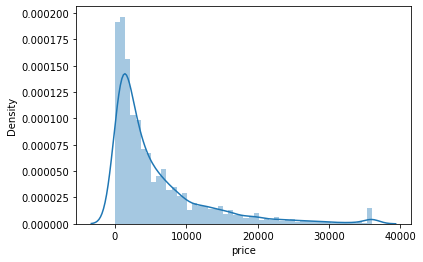

In [31]:
sns.distplot(df_cars['price'])

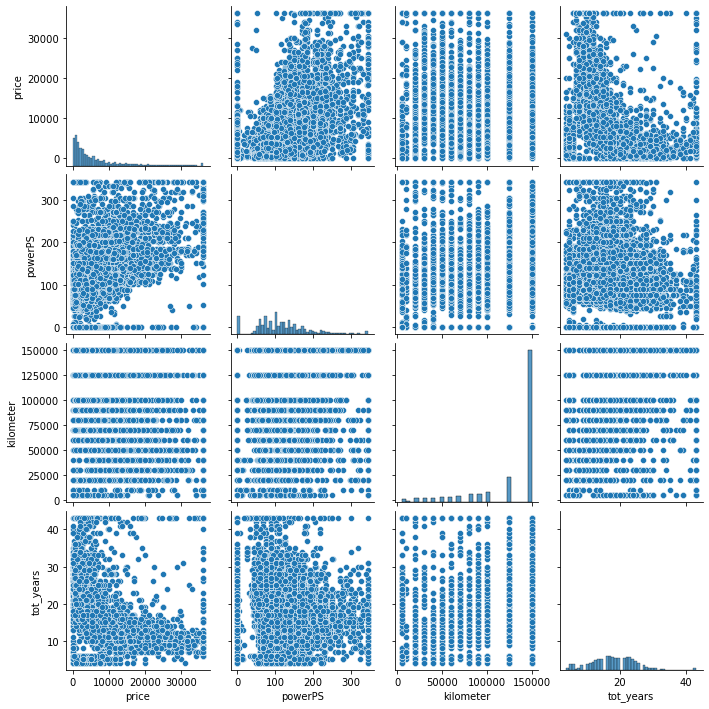

In [89]:
sns.pairplot(data=df_cars)


**we are cleary see the data as we have values ranges so high so we need to standardixe the data**

# Encoding on categorical columns
### Lets Handle Categorical data..we have fueltype and gearbox data as categorical data

In [33]:
df_cars.shape

(9239, 7)

In [34]:
#importing useful modules for encoding
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(copy=True, 
                            with_mean=True, 
                            with_std=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()# creating the object

In [37]:
# Separting depending and independent variables
X_fin=df_cars.drop(['brand','price'],axis=1).values


y_fin=df_cars['price'].values

In [38]:
X_tr=X_fin.copy()
X_tr

array([['manuell', 89, 60000, 'benzin', 30],
       ['manuell', 150, 125000, 'benzin', 26],
       ['manuell', 150, 150000, 'benzin', 24],
       ...,
       ['manuell', 140, 150000, 'benzin', 11],
       ['manuell', 58, 150000, 'benzin', 20],
       ['manuell', 101, 60000, 'benzin', 10]], dtype=object)

In [39]:
X_tr[:,0]=le.fit_transform(X_tr[:,0])

In [40]:
X_tr[:,3]=le.fit_transform(X_tr[:,3])

X_tr



array([[1, 89, 60000, 0, 30],
       [1, 150, 125000, 0, 26],
       [1, 150, 150000, 0, 24],
       ...,
       [1, 140, 150000, 0, 11],
       [1, 58, 150000, 0, 20],
       [1, 101, 60000, 0, 10]], dtype=object)

In [41]:
y=y_fin.copy()


# Feature Scaling

In [42]:
X = std_scaler.fit_transform(X_tr) # we are transforming our data into Normalization



In [43]:
y = std_scaler.fit_transform(y.reshape(-1,1))
y

array([[-0.78468304],
       [-0.33401519],
       [-0.52300493],
       ...,
       [ 0.55278285],
       [-0.70181831],
       [ 0.31872632]])

In [44]:
# 4. Apply various regression models and find out which model is the best for this dataset

# Lets Spilt data into  Train the Test Data

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


# Creating Linear regression model

In [46]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

# predict the test Result

In [47]:
y_pred=li.predict(x_test)
y_pred

array([[ 0.12203289],
       [ 1.79149834],
       [ 0.37132559],
       ...,
       [-0.91788877],
       [-0.60518441],
       [-0.24659139]])

# Evaluate the model

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6008943701655364

### Our model is giving accuracy of 0.6 

# Plot the result

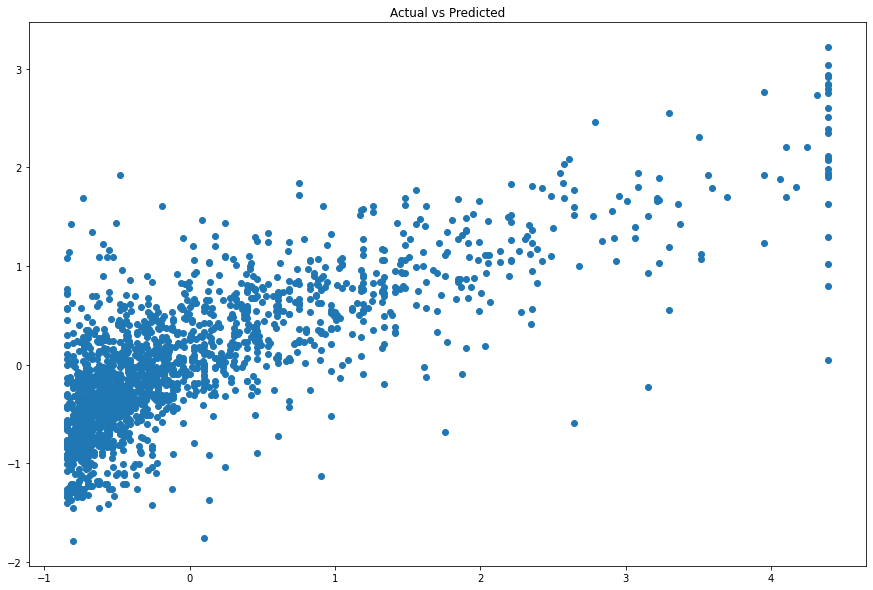

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.title("Actual vs Predicted");

In [50]:

from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              2208.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:01:40   Log-Likelihood:                         -9477.1
No. Observations:                9239   AIC:                                  1.896e+04
Df Residuals:                    9234   BIC:                                  1.900e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1014      0.008    -13.229      0.000      -0.116      -0.086
x2             0.4724      0.008     61.149      0.000       0.457       0.488
x3            -0.3747      0.007    -50.883      0.000      -0.389      -0.360
x4             0.0522      0.007      7.425      0.000       0.038       0.066
x5            -0.2029      0.007    -27.256      0.000      -0.217      -0.188
==============================================================================
Omnibus:                     3283.179   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25674.311
Skew:                           1.492   Prob(JB):                         0.00
Kurtosis:                      10.602   Cond. No.                         1.61
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We can see Summary of our liner regression model as above<br>
  1- we have R-square value about 0.55<br>
  2- we can see all variables are significant as per p value**


In [51]:
from sklearn.metrics import mean_squared_error
mse_li=mean_squared_error(y_test,y_pred)
mse_li

0.43333690735761243

# Using Ridge regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [53]:
y_pred

array([[ 0.12203289],
       [ 1.79149834],
       [ 0.37132559],
       ...,
       [-0.91788877],
       [-0.60518441],
       [-0.24659139]])

In [54]:
r2_ridge=r2_score(y_test,y_pred_ridge)
print("r2 square error using ridge function on test set is",r2_ridge)

r2 square error using ridge function on test set is 0.6008838446367628


In [55]:
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
mse_ridge

0.43334833566066316

# using Lasso Regression

In [56]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [57]:

clf.fit(x_train,y_train)
y_pred_clf=clf.predict(x_test)

In [58]:
r2_clf=r2_score(y_test,y_pred_clf)
print("r2 square error using ridge function on test set is",r2_clf)

r2 square error using ridge function on test set is 0.5491091944653551


In [59]:
mse_clf=mean_squared_error(y_test,y_pred_clf)
mse_clf

0.4895636959754395

### If we comapre linear,lasso & ridge regression they are almost giving same results.Linear and Ridge regression are slight  good with the prediction on test data as compare to the lasso.

# Using Decision tree regressor algorithem

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
regressor = DecisionTreeRegressor(random_state=0)


In [62]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [63]:
y_predict=regressor.predict(x_test)

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mse=mean_squared_error(y_test,y_predict)
mse

0.41624483973162096

In [66]:
rmse=np.sqrt(mse)
rmse

0.6451703958890402

In [67]:
from sklearn.model_selection import cross_val_score
CV=cross_val_score(regressor, X, y, cv=5)

## So here we are getting accuracy slight more that linear regression

In [68]:
np.mean(CV)

0.6318975974400164

## Conclusion: We have checked MSE  and R-score of every model that we have trained and we can conclude that
## 1- Decision Tree and Linerar regression  model performing quite better than other models
## 2- we have not seen significant improvement in model by performing scaling, hyperparamerter tuning etc.

In [69]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 


## There are few outlier detection methods to detect the outliers in our Dataset as below

### Here we will only see price variable of our dataframe to understand outliers detection methods

### Box Plot detection

<AxesSubplot:>

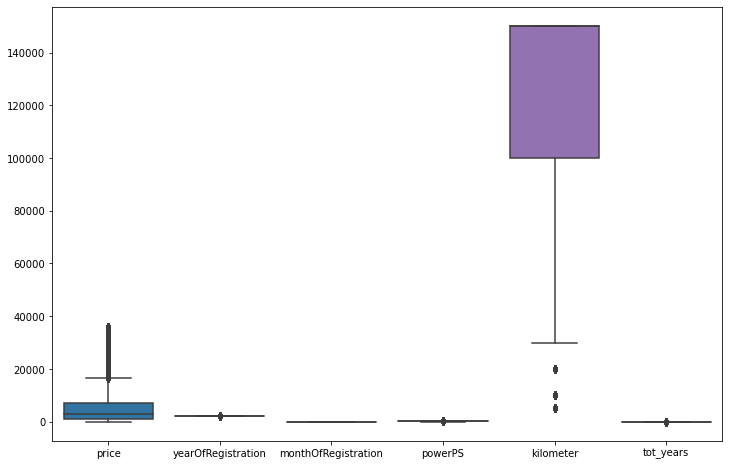

In [70]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)



### IQR Method

In [71]:
Q1,Q3 = np.percentile(df["price"],[25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outliers = df["price"][(df["price"] > ul) | (df["price"] < ll)]
outliers.count()

762

### Using Z score method

In [72]:
def find_outliers(col):
    from scipy import stats
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=df.index)

idx= find_outliers (df['price'])
np.sum(idx)

260

###  Using Isolation Forest

In [73]:
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(df[['price']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x23EDC4C9B40, 'verbose': 0, 'warm_start': False}


In [74]:
df['price'] = model.decision_function(df[['price']])

df['anomaly_score'] = model.predict(df[['price']])

df[df['anomaly_score']==-1].head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType,tot_years,anomaly_score


## Best approch to treat outliers=Quantile Method-Capping Approach

In [75]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df_OL=cap_data(df)

capping the  price
capping the  name
capping the  yearOfRegistration
capping the  monthOfRegistration
capping the  gearbox
capping the  powerPS
capping the  model
capping the  kilometer
capping the  fuelType
capping the  brand
capping the  vehicleType
capping the  tot_years
capping the  anomaly_score


In [76]:
df_OL.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType,tot_years,anomaly_score
0,0.044574,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi,30,1
1,0.070340,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio,26,1
2,0.074202,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi,24,1
3,0.077717,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine,16,1
4,0.066837,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio,20,1


In [77]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

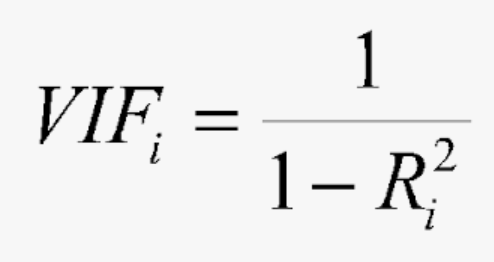

## lets import VIF module from Statmodels Library

In [78]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [79]:
X_dt = np.array(X_tr, dtype=float)

In [80]:
col=['gearbox','powerPS','kilometer','fuelType','tot_years']
X_df=pd.DataFrame(data=X_dt,columns=col)
X_df

,gearbox,powerPS,kilometer,fuelType,tot_years
0,1.0,89.0,60000.0,0.0,30.0
1,1.0,150.0,125000.0,0.0,26.0
2,1.0,150.0,150000.0,0.0,24.0
3,1.0,0.0,150000.0,0.0,16.0
4,0.0,41.0,150000.0,0.0,20.0
...,...,...,...,...,...
9234,1.0,90.0,150000.0,0.0,17.0
9235,1.0,80.0,150000.0,0.0,17.0
9236,1.0,140.0,150000.0,0.0,11.0
9237,1.0,58.0,150000.0,0.0,20.0


In [81]:
# we are creating function to calculate the VIF factor
def calculate_vif(X_df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif["features"] = X_df.columns
    return (vif)

In [82]:

calculate_vif(X_df)

,VIF Factor,features
0,3.832956,gearbox
1,3.209670,powerPS
2,9.451129,kilometer
3,1.001783,fuelType
4,7.367270,tot_years


**Here we can see we have VIF Values for every attribute...As we know generally the variables with VIF Factor values more than 5 we need to drop it to avoid multicolineralty.here we have two variables or columns<br>
1-kilometer<br>
2-tot_years**

### Lets choose right variable to drop to avoid multicolinearity

In [83]:
X_df['price']=df_cars['price']

In [84]:
# we are checking our independednt values relationship with dependent variable y that is price to choose best variable and drop other to tackle the problem of multicolinearity
X_df.corr()

,gearbox,powerPS,kilometer,fuelType,tot_years,price
gearbox,1.000000,-0.397526,0.042955,-0.023248,0.080161,0.002034
powerPS,-0.397526,1.000000,-0.020996,0.002347,-0.150842,-0.014375
kilometer,0.042955,-0.020996,1.000000,-0.004782,0.297855,-0.009716
fuelType,-0.023248,0.002347,-0.004782,1.000000,0.001150,-0.007013
tot_years,0.080161,-0.150842,0.297855,0.001150,1.000000,-0.004809
price,0.002034,-0.014375,-0.009716,-0.007013,-0.004809,1.000000


<AxesSubplot:>

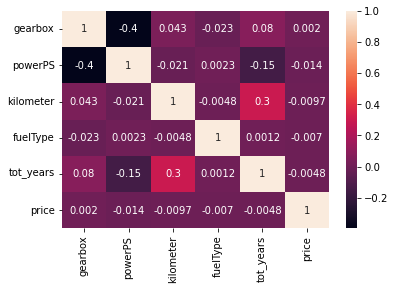

In [85]:
sns.heatmap(X_df.corr(), annot=True)

## Conclusion: We can drop  tot_years columns and keep kilometer column to avoid any type of multicolinaerity